Домашнее задание по теме «Регрессия Decision Tree»

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import mean_absolute_error
# Импорт моделей и инструментов для дерева решений
from sklearn.tree import (
    DecisionTreeRegressor
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

Загружаем данные

In [2]:
train_df=pd.read_csv('Blockbuster_prices_1999-2025.csv')

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
train_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-08-11 00:00:00-04:00,8.89,8.93,8.89,8.89,11909600,0.00,0.00
1,1999-08-12 00:00:00-04:00,8.89,10.00,8.89,8.89,4982500,0.00,0.00
2,1999-08-13 00:00:00-04:00,9.74,9.74,9.30,9.48,1265400,0.00,0.00
3,1999-08-16 00:00:00-04:00,9.33,9.33,8.89,8.89,1166300,0.00,0.00
4,1999-08-17 00:00:00-04:00,8.89,8.93,8.15,8.19,1250800,0.00,0.00


In [4]:
train_df.info(memory_usage=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6426 entries, 0 to 6425
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6426 non-null   object 
 1   Open          6426 non-null   float64
 2   High          6426 non-null   float64
 3   Low           6426 non-null   float64
 4   Close         6426 non-null   float64
 5   Volume        6426 non-null   int64  
 6   Dividends     6426 non-null   float64
 7   Stock Splits  6426 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 401.8+ KB


In [15]:
train_df = train_df.drop('Date', axis=1)
train_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,8.89,8.93,8.89,8.89,11909600,0.00,0.00
1,8.89,10.00,8.89,8.89,4982500,0.00,0.00
2,9.74,9.74,9.30,9.48,1265400,0.00,0.00
3,9.33,9.33,8.89,8.89,1166300,0.00,0.00
4,8.89,8.93,8.15,8.19,1250800,0.00,0.00
...,...,...,...,...,...,...,...
6421,0.00,0.00,0.00,0.00,100,0.00,0.00
6422,0.00,0.00,0.00,0.00,16400,0.00,0.00
6423,0.00,0.00,0.00,0.00,19400,0.00,0.00
6424,0.00,0.00,0.00,0.00,83850,0.00,0.00


In [16]:
#Подсчитываем сколько процентов незаполнено столбце
percent_missing = train_df.isnull().sum() * 100 / len(train_df.index)
missing_value_df = pd.DataFrame({'Незаполнено столбце %': percent_missing})

missing_value_df

,Незаполнено столбце %
Open,0.00
High,0.00
Low,0.00
Close,0.00
Volume,0.00
Dividends,0.00
Stock Splits,0.00


Уменьшим вес таблицы с помощью изменения типа данных.

In [17]:
int_cols = train_df.select_dtypes('int').columns

float_cols = train_df.select_dtypes('float').columns
for col in int_cols:
    train_df[col] = pd.to_numeric(train_df[col], downcast='integer')
for col in float_cols:
    train_df[col] = pd.to_numeric(train_df[col], downcast='float')

In [18]:
train_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6426 entries, 0 to 6425
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6426 non-null   float32
 1   High          6426 non-null   float32
 2   Low           6426 non-null   float32
 3   Close         6426 non-null   float32
 4   Volume        6426 non-null   int32  
 5   Dividends     6426 non-null   float32
 6   Stock Splits  6426 non-null   float32
dtypes: float32(6), int32(1)
memory usage: 175.8 KB


# EDA

In [19]:
#Подсчитываем сколько процентов незаполнено столбце
percent_missing = train_df.isnull().sum() * 100 / len(train_df.index)
missing_value_df = pd.DataFrame({'Незаполнено столбце %': percent_missing})

missing_value_df

,Незаполнено столбце %
Open,0.00
High,0.00
Low,0.00
Close,0.00
Volume,0.00
Dividends,0.00
Stock Splits,0.00


In [20]:
#Находим максимальные и минимальные значения
min_max_df = pd.DataFrame({'Максимальное значение': train_df.max(), 'Минимальное значение': train_df.min()})

min_max_df

,Максимальное значение,Минимальное значение
Open,17.90,0.00
High,18.20,0.00
Low,17.58,0.00
Close,18.05,0.00
Volume,"69,030,690.00",0.00
Dividends,5.00,0.00
Stock Splits,0.00,0.00


In [21]:
#Находим средние значения
mean_df = pd.DataFrame({'Среднее значение': train_df.mean()})

mean_df

,Среднее значение
Open,2.94
High,3.00
Low,2.87
Close,2.94
Volume,"1,283,074.34"
Dividends,0.00
Stock Splits,0.00


In [23]:
#Находим медиану
median_df = pd.DataFrame({'Медиана': train_df.median()})

median_df

,Медиана
Open,0.02
High,0.03
Low,0.02
Close,0.02
Volume,"224,350.00"
Dividends,0.00
Stock Splits,0.00


In [24]:
#Находим дисперсию
var_df = pd.DataFrame({'Диспрерсия': train_df.var()})

var_df

,Диспрерсия
Open,19.38
High,20.07
Low,18.64
Close,19.37
Volume,"9,110,123,432,263.73"
Dividends,0.00
Stock Splits,0.00


In [25]:
#Находим квантиль 0.1 и 0.9
quantile_df = pd.DataFrame({'Квантиль 0.1': train_df.quantile(0.1), 'Квантиль 0.9': train_df.quantile(0.9)})

quantile_df

,Квантиль 0.1,Квантиль 0.9
Open,0.00,10.17
High,0.00,10.32
Low,0.00,9.96
Close,0.00,10.16
Volume,"1,290.00","3,541,450.00"
Dividends,0.00,0.00
Stock Splits,0.00,0.00


In [26]:
#Находим квартиль 1 и 3
quartile_df = pd.DataFrame({'Квартиль 1': train_df.quantile(0.25), 'Квартиль 3': train_df.quantile(0.75)})

quartile_df

,Квартиль 1,Квартиль 3
Open,0.00,5.34
High,0.01,5.46
Low,0.00,5.22
Close,0.01,5.35
Volume,"16,638.50","1,340,873.50"
Dividends,0.00,0.00
Stock Splits,0.00,0.00


# Обработка данных

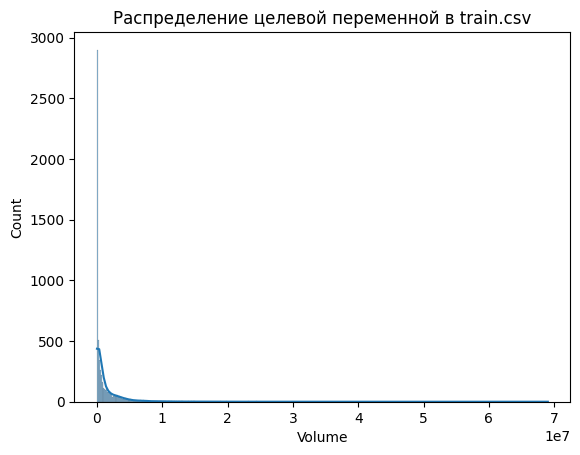

In [28]:
sns.histplot(train_df['Volume'], kde=True)
plt.title("Распределение целевой переменной в train.csv")
plt.show()

Можно заметить несколько скачков в графике. Посмотрим на распределение данных во всей таблице

In [29]:
# посчитаем квантили распределения
train_df['Volume'].describe(percentiles=[0.1, 0.25, 0.75, 0.95 ])

count        6,426.00
mean     1,283,074.34
std      3,018,298.10
min              0.00
10%          1,290.00
25%         16,638.50
50%        224,350.00
75%      1,340,873.50
95%      5,459,486.25
max     69,030,690.00
Name: Volume, dtype: float64

In [30]:
train_df.describe(include='all')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"6,426.00","6,426.00","6,426.00","6,426.00","6,426.00","6,426.00","6,426.00"
mean,2.94,3.00,2.87,2.94,"1,283,074.34",0.00,0.00
std,4.40,4.48,4.32,4.40,"3,018,298.10",0.06,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.01,0.00,0.01,"16,638.50",0.00,0.00
50%,0.02,0.03,0.02,0.02,"224,350.00",0.00,0.00
75%,5.34,5.46,5.22,5.35,"1,340,873.50",0.00,0.00
max,17.90,18.20,17.58,18.05,"69,030,690.00",5.00,0.00


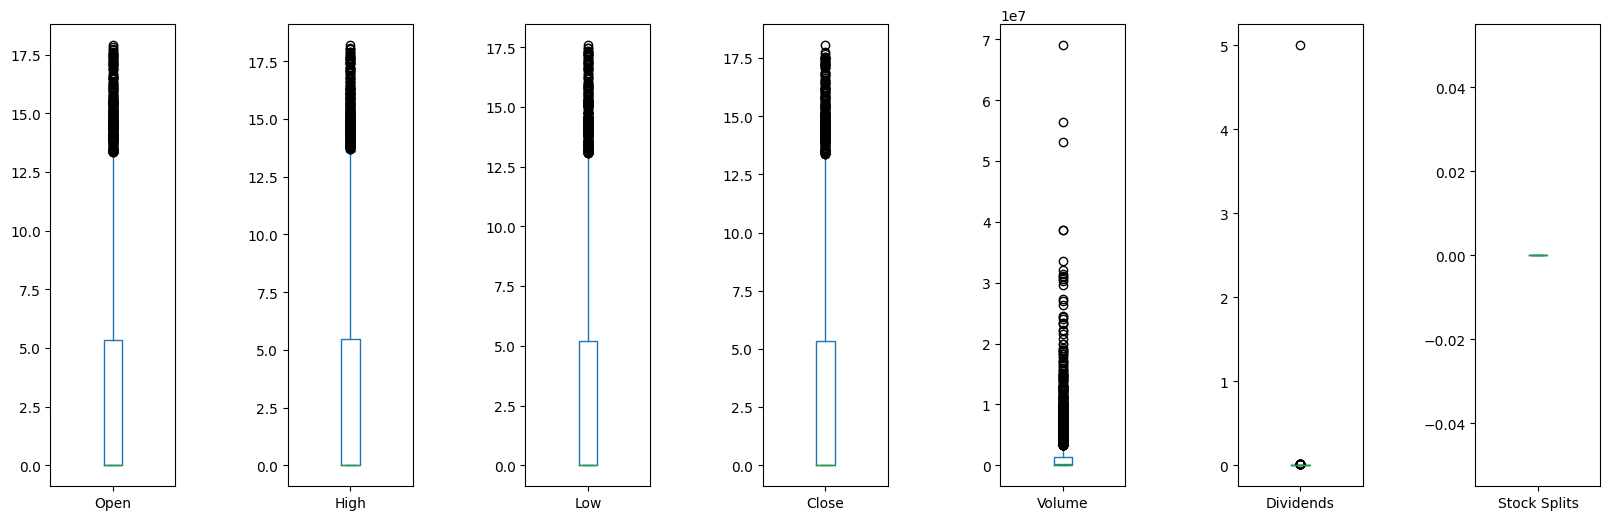

In [32]:
train_df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize= (20,6))

plt.subplots_adjust(wspace=0.9)
plt.show()

В столбцах 'Annual Income', 'Previous Claims', 'Premium Amount' можно заметить выбросы. Избавимся от них

In [33]:
def RemoveOutliers(df, column):
    # убираем выбросы
    Q3 = np.quantile(df[column], 0.75, axis=0)
    Q1 = np.quantile(df[column], 0.25, axis=0)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df[column] = np.where((df[column] > upper), upper, df[column])
    df[column] = np.where((df[column] < lower), lower, df[column])
    return df

In [34]:
for col in train_df.columns:
    train_df = RemoveOutliers(train_df, col)

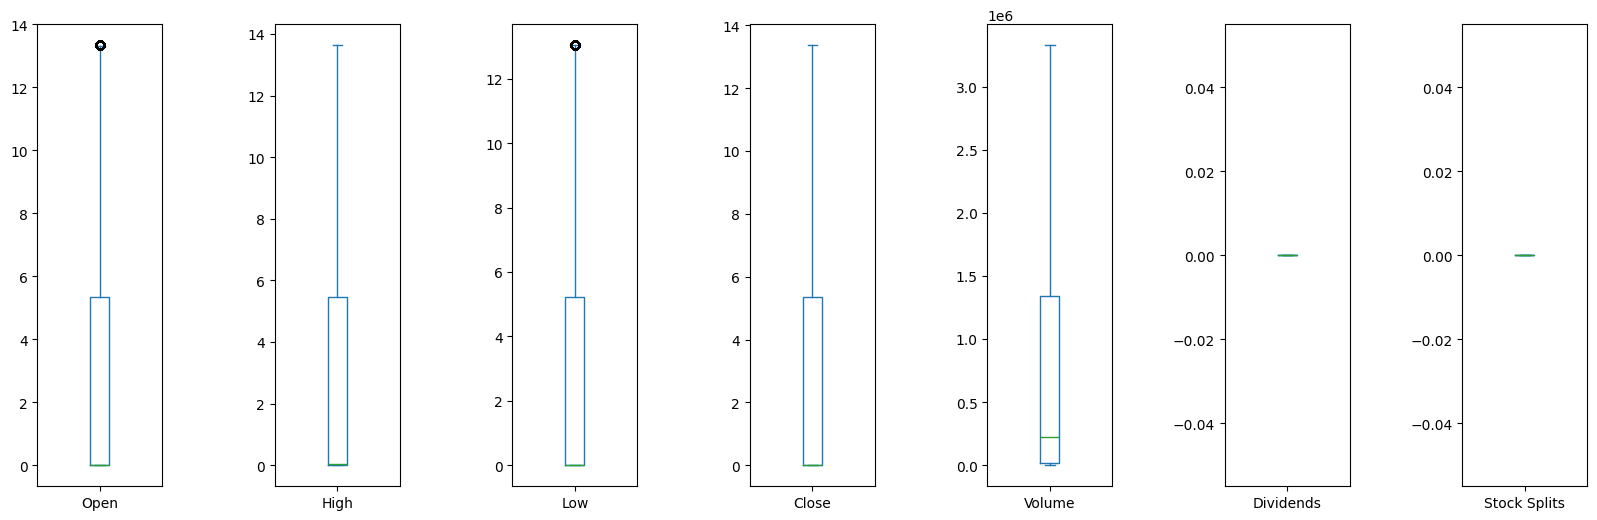

In [35]:
train_df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize= (20,6))

plt.subplots_adjust(wspace=0.9)
plt.show()

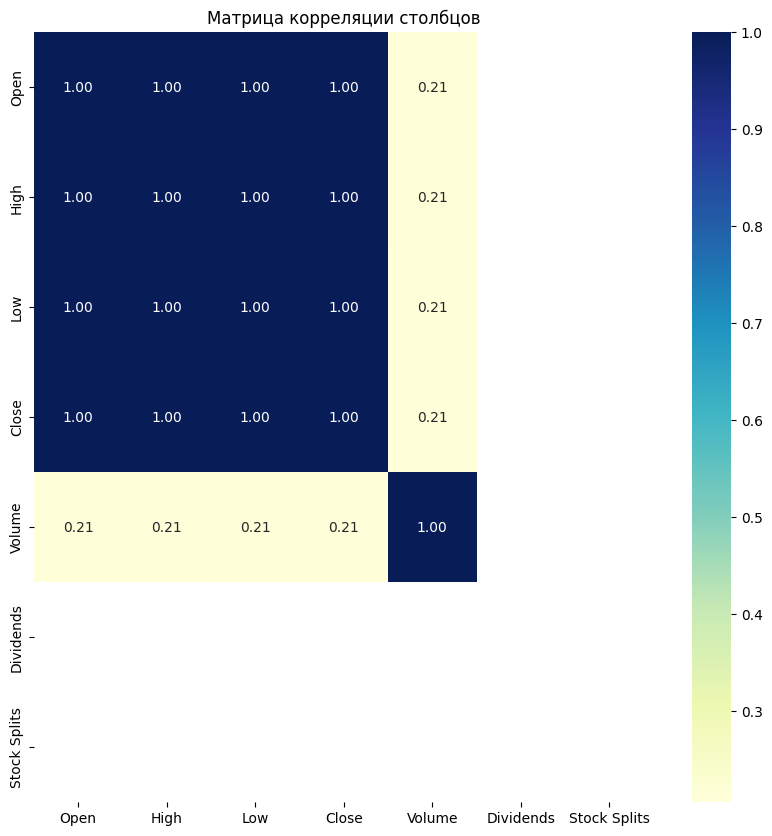

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Матрица корреляции столбцов")
plt.show()

Между столбцами нет сильной корреляции. Нет необходимости какой-либо из них удалять.

# Обучение моделей

In [37]:
X = train_df.drop('Volume', axis=1)
Y = train_df['Volume']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3, random_state = 42)

In [39]:
# словарь для оценок качества моделей
regression_error = {}

# Модель регрессии дерева решений

In [40]:
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(X_train, y_train)
Y_pred_test = regressor_tree.predict(X_test)
regression_error['Regressor tree'] = {"RMSE":root_mean_squared_error(y_test, Y_pred_test),"MSE":mean_squared_error(y_test, Y_pred_test), "MAE": mean_absolute_error(y_test, Y_pred_test)}

In [41]:
regression_error['Regressor tree']

{'RMSE': 829387.2588481822, 'MSE': 687883225139.7015, 'MAE': 440520.4137862135}

# Подборка гиперпараметров

In [42]:
from sklearn.model_selection import GridSearchCV

def findDecisionTreeRegressor(X_train, y_train):

    param_grid = {
    'max_depth': [ 1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.01, 0.02, 0.03]
}

    # Поиск лучших гиперпараметров
    grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5,n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Лучшие гиперпараметры
    best_params = grid_search.best_params_
    print(f"Лучшие гиперпараметры: {best_params}")
    return grid_search

In [43]:
grid_search = findDecisionTreeRegressor(X_train, y_train)

Лучшие гиперпараметры: {'ccp_alpha': 0.01, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [44]:
# Создаем модель с лучшим параметры
dt_regression = grid_search.best_estimator_

In [45]:
Y_pred_test = dt_regression.predict(X_test)
regression_error['Regressor tree with best params'] = {"RMSE":root_mean_squared_error(y_test, Y_pred_test),"MSE":mean_squared_error(y_test, Y_pred_test), "MAE": mean_absolute_error(y_test, Y_pred_test)}

In [46]:
regression_error['Regressor tree with best params']

{'RMSE': 716077.7662670395, 'MSE': 512767367341.99286, 'MAE': 449196.342867935}

In [47]:
pd.options.display.float_format = '{:,.5f}'.format
regression_error_df = pd.DataFrame(regression_error)
regression_error_df

,Regressor tree,Regressor tree with best params
RMSE,"829,387.25885","716,077.76627"
MSE,"687,883,225,139.70154","512,767,367,341.99286"
MAE,"440,520.41379","449,196.34287"


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

def calculate_metrics_and_plot_roc(model, X_train, y_train, X_test, y_test):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание вероятностей на обучающей и тестовой выборке
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Расчет AUC-ROC
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    print(f"ROC-AUC Train: {roc_auc_train:.2f}")
    print(f"ROC-AUC Test: {roc_auc_test:.2f}")

    # Построение ROC-кривой
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC Curve Train')
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC Curve Test')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({type(model).__name__})')
    plt.legend()
    plt.show()

    # Поиск порога, максимизирующего F1-score
    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = [f1_score(y_test, y_test_proba >= t) for t in thresholds]
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Optimal Threshold: {optimal_threshold:.2f}")

    # Пересчет метрик с учетом оптимального порога
    y_train_pred_optimal = (y_train_proba >= optimal_threshold).astype(int)
    y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)

    train_precision = precision_score(y_train, y_train_pred_optimal)
    train_accuracy = accuracy_score(y_train, y_train_pred_optimal)
    train_recall = recall_score(y_train, y_train_pred_optimal)
    test_precision = precision_score(y_test, y_test_pred_optimal)
    test_accuracy = accuracy_score(y_test, y_test_pred_optimal)
    test_recall = recall_score(y_test, y_test_pred_optimal)

    print(f"Optimal Training Precision: {train_precision:.2f}")
    print(f"Optimal Training Аccuracy: {train_accuracy:.2f}")
    print(f"Optimal Training Recall: {train_recall:.2f}")
    print(f"Optimal Test Precision: {test_precision:.2f}")
    print(f"Optimal Test Аccuracy: {test_accuracy:.2f}")
    print(f"Optimal Test Recall: {test_recall:.2f}")

    metrics = {
        'params': [
            'Training_Precision', 'Test_Precision',
            'Training_Аccuracy','Test_Аccuracy',
            'Training_Recall', 'Test_Recall',
            'ROC_AUC_Train', 'ROC_AUC_Test'
        ],
        'values': [
            train_precision, test_precision,
            train_accuracy, test_accuracy,
            train_recall, test_recall,
            roc_auc_train, roc_auc_test
        ]
    }

    return metrics

In [50]:
from sklearn.model_selection import GridSearchCV

def findDecisionTreeClassifier(X_train, y_train):

    param_grid = {
        'max_depth': range(1, 10, 1),
        'min_samples_leaf': range(1, 20, 2),
        'min_samples_split': range(2, 20, 2),
        'criterion': ["entropy", "gini"]
    }

    # Поиск лучших гиперпараметров
    grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Лучшие гиперпараметры
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Лучшие гиперпараметры: {best_params}")
    print(f"Лучшая точность на валидационной выборке: {best_score}")
    return grid_search

In [51]:
grid_search = findDecisionTreeClassifier(X_train, y_train)

c:\Users\Пользователь\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Лучшие гиперпараметры: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая точность на валидационной выборке: 0.15101271785209608


In [53]:
# Создаем модель с лучшим параметры
dt_classifier = grid_search.best_estimator_

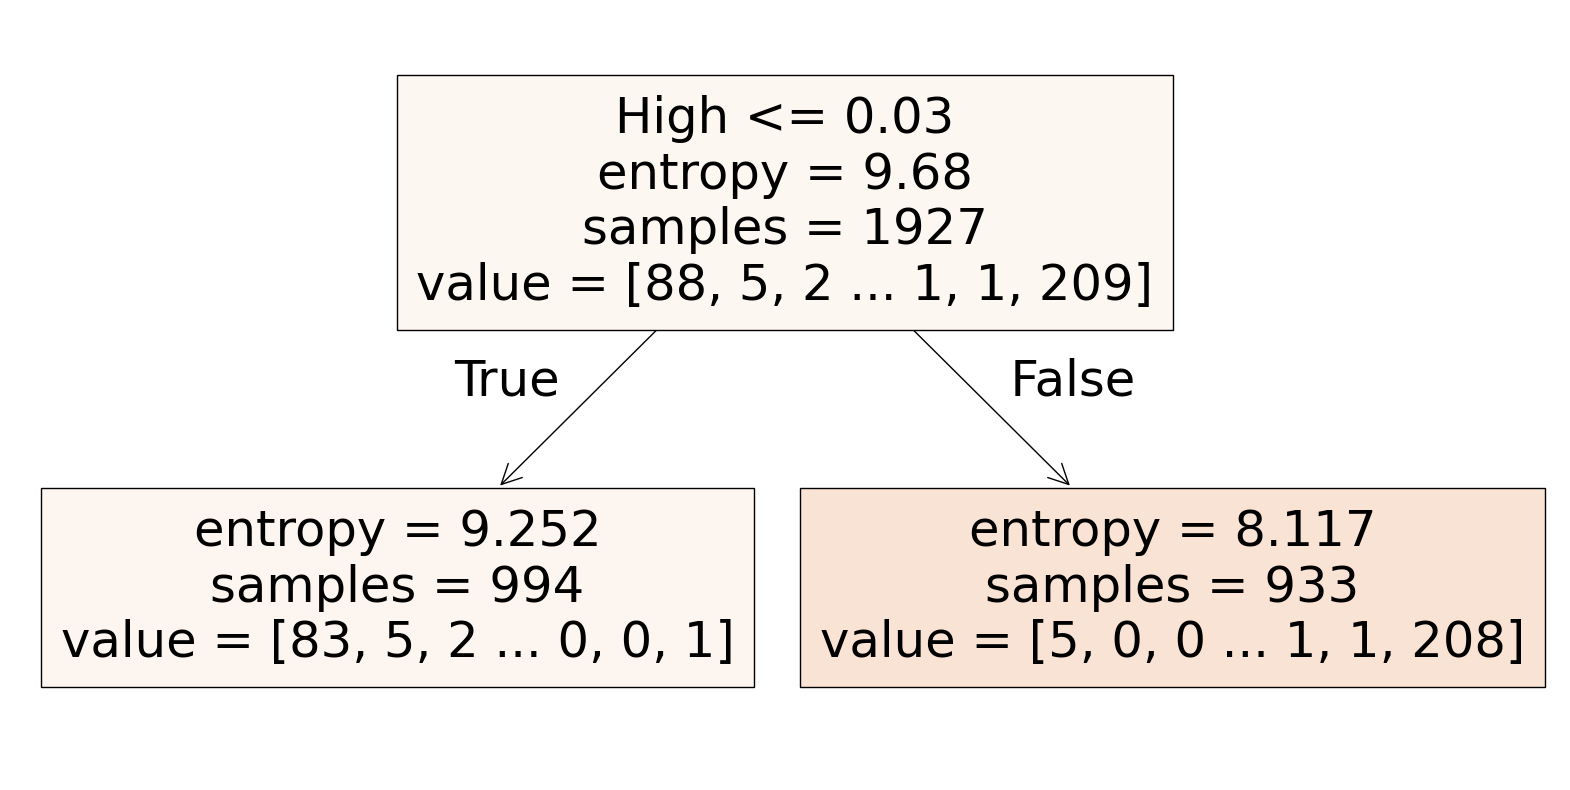

In [55]:
fig = plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, max_depth=2, feature_names=X.columns)
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [57]:
# словарь для оценок качества моделей
regression_error = {}

In [58]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
Y_pred_test = svr.predict(X_test)
regression_error['SVR'] = {"RMSE":root_mean_squared_error(y_test, Y_pred_test),"MSE":mean_squared_error(y_test, Y_pred_test), "MAE": mean_absolute_error(y_test, Y_pred_test)}

In [59]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
Y_pred_test = knn.predict(X_test)
regression_error['KNN'] = {"RMSE":root_mean_squared_error(y_test, Y_pred_test),"MSE":mean_squared_error(y_test, Y_pred_test), "MAE": mean_absolute_error(y_test, Y_pred_test)}

In [60]:
pd.options.display.float_format = '{:,.5f}'.format
regression_error_df = pd.DataFrame(regression_error)
regression_error_df

,SVR,KNN
RMSE,"1,326,641.23239","690,427.57257"
MSE,"1,759,976,959,487.84351","476,690,232,967.33417"
MAE,"811,225.17400","402,265.47446"


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform

# Обучение SVR с ядром и трубкой
# Определение сетки гиперпараметров для SVR
param_grid = [
    {'kernel':['linear'], 'C': np.linspace(0.001, 10, num=100), 'epsilon': uniform(loc=0.01, scale=0.09)},
    # мой ноутбук начинает зависать при degree > 3
    {'kernel':['poly'], 'degree':[2, 3], 'C':np.linspace(0.001, 10, num=100), 'epsilon': uniform(loc=0.01, scale=0.09)},
    {'kernel':['sigmoid'], 'C':np.linspace(0.001, 10, num=100), 'epsilon': uniform(loc=0.01, scale=0.09)},
    {'kernel': ['rbf'], 'gamma': ['scale', 'auto', 0.1, 0.5, 1, 5, 10], 'C':np.linspace(0.001, 10, num=100), 'epsilon': uniform(loc=0.01, scale=0.09)}
]

# Создание модели SVR
svr = SVR()

# Настройка RandomizedSearchCV
grid_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, n_iter=20)

# Обучение моделей с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и наименьшей ошибки
print("Лучшие параметры: ", grid_search.best_params_)
print("Наименьшая ошибка: ", -grid_search.best_score_)

Лучшие параметры:  {'C': np.float64(9.192), 'epsilon': np.float64(0.04038615495593496), 'gamma': 1, 'kernel': 'rbf'}
Наименьшая ошибка:  1731855665060.8474


In [62]:
# Обучение модели с лучшими параметрами
best_svr_model = grid_search.best_estimator_ # лучшая модель

In [63]:
best_svr_model.fit(X_train, y_train)
Y_pred_test = best_svr_model.predict(X_test)
regression_error['SVR with best params'] = {"RMSE":root_mean_squared_error(y_test, Y_pred_test),"MSE":mean_squared_error(y_test, Y_pred_test), "MAE": mean_absolute_error(y_test, Y_pred_test)}

In [64]:
regression_error_df = pd.DataFrame(regression_error)
regression_error_df

,SVR,KNN,SVR with best params
RMSE,"1,326,641.23239","690,427.57257","1,325,522.59494"
MSE,"1,759,976,959,487.84351","476,690,232,967.33417","1,757,010,149,708.08765"
MAE,"811,225.17400","402,265.47446","809,547.02189"
